# model

In [3]:
import json 
import torch
import torchvision
from torch import nn

from tqdm.auto import tqdm
from utils import buit_eval_model, load_json, clear_folder, split_json, judge
import os
from model import MAE
import numpy as np
from utils_cam import web_cam, node_json, visualize
model_path = 'D:\google drive\MAE Bs PJ\state_dict\epoch 3-4200 weight.pt'
CHECKPOINT_PATH = 'checkpoint.tar'

checkpoint = torch.load(CHECKPOINT_PATH)
step = checkpoint['step']
mean = checkpoint['mean']
std = checkpoint['std']
sample_num = 100
model = buit_eval_model(model_path)

In [8]:
class_name = 'record'

In [9]:
clear_folder(rf'dataset\{class_name}\{class_name}')
save_folder = os.path.join('dataset', class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, class_name)
os.makedirs(save_folder, exist_ok=True)

In [10]:
json_path = rf'dataset\{class_name}\{class_name}\segment_0.json'

In [11]:
web_cam(save_folder=save_folder)
node_json(input_video, save_folder ,show=True)
split_json(input_json, output_folder, time_mark_path)

107 108
(61, 42, 2)


In [9]:
vector_list = []
x = load_json(json_path, mean, std, augment=False).to('cuda')
prediction = model(x)
vector_list.append(prediction.squeeze().tolist())

In [12]:
visualize(json_path)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\record\\record\\segment_0.json'

# calculate cosine_similarity

In [11]:
from utils import cosine_similarity
import matplotlib.pyplot as plt
import json
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

In [12]:
def sort(array1, array2):
    pair = []
    paired_arrays = list(zip(array1, array2))
    sorted_arrays = sorted(paired_arrays, key=lambda x: x[0], reverse=True)
    sorted_array1, sorted_array2 = zip(*sorted_arrays)

    for item in zip(sorted_array1, sorted_array2):
        pair.append(item)
    return pair

def show_boxplot(x, labels, title):
    plt.figure(figsize=(16, 6))
    plt.boxplot(x, labels=labels)
    plt.title(title)
    plt.show()

In [13]:
# def calculate_cosine_similarity(vector, feature_path = 'feature.json'):
#     with open(feature_path, 'r') as f:
#         class_features = json.load(f)
#     id_vector = [value for value in class_features.items()]
#     similarity_list, id_list = [], []
#     for id, vector_i in id_vector:
#         # print(np.mean(np.array(vector),0).shape, np.mean(np.array(vector_i),0).shape)
#         similarity_list.append(round(cosine_similarity(vector1=np.mean(np.array(vector),0),
#                                                        vector2=np.mean(np.array(vector_i),0)), 4))
#         id_list.append(id)
#         # print(round(cosine_similarity(vector1=np.array(vector1), vector2=np.array(vector2)), 4), id)
#     return sort(similarity_list, id_list)

In [14]:
def calculate_cosine_similarity(vector, class_features):
    id_vector = [value for value in class_features.items()]
    similarity_list, id_list = [], []
    for id, vector_i in id_vector:
        # print(id, len(vector_i))
        container = []
        for feature_i in vector_i:
            container.append(cosine_similarity(vector1=np.array(vector), vector2=np.array(feature_i)))

        similarity_list.append(container)
        id_list.append(id)
    return similarity_list, id_list

def sort_list(similarity_list, id_list):
    max_list = []
    for container in similarity_list:
        max_list.append(max(container))
        
    return sort(max_list, id_list)


In [15]:
with open('delete_list.json', 'r') as f:
    delete_List = json.load(f)

with open(r'features\expriment.json', 'r') as f:
    expriment_features = json.load(f)
for tag in delete_List:
    try:
        del expriment_features[tag]
    except:
        pass

id_vector = [value for value in expriment_features.items()]

with open(r'features\feature.json', 'r') as f:
    class_features = json.load(f)
for tag in delete_List:
    try:
        del class_features[tag]
    except:
        pass

In [7]:
matrix = []
for id, vector_list in tqdm(id_vector):
    for i, vector_i in enumerate(vector_list):
        similarity_list, id_list = calculate_cosine_similarity(vector_i, class_features)

        # show_boxplot(similarity_list, id_list, f'{id}-{i}')
        # print(vector_i, class_features)
        x = sort_list(similarity_list, id_list)
        # rank = [item[1] for item in x]
        matrix.append({'index':i,'tag':id,'list':x})

  0%|          | 0/168 [00:00<?, ?it/s]

In [16]:
matrix = []
similarity_list, id_list = calculate_cosine_similarity(vector_list, class_features)

x = sort_list(similarity_list, id_list)
matrix.append({'index':0,'list':x})

In [18]:
matrix

[{'index': 0,
  'list': [(array([0.99566155]), '做'),
   (array([0.93879668]), '不會'),
   (array([0.90864694]), '每'),
   (array([0.90094472]), '賣'),
   (array([0.89806708]), '第一名'),
   (array([0.89442758]), '每天'),
   (array([0.89344382]), '教'),
   (array([0.89074071]), '明年'),
   (array([0.88982033]), '設計'),
   (array([0.88809066]), '裡'),
   (array([0.88651692]), '演講'),
   (array([0.8861461]), '考試'),
   (array([0.88591558]), '溝通'),
   (array([0.8847501]), '報紙'),
   (array([0.88422778]), '學習'),
   (array([0.8821676]), '住'),
   (array([0.88010928]), '習慣'),
   (array([0.8789945]), '對'),
   (array([0.87877741]), '努力'),
   (array([0.87715117]), '注意'),
   (array([0.87335505]), '會'),
   (array([0.87074149]), '消遣'),
   (array([0.86842972]), '森林'),
   (array([0.86534544]), '比較'),
   (array([0.86009468]), '比賽'),
   (array([0.85645346]), '其中'),
   (array([0.85217024]), '飲料'),
   (array([0.84750718]), '會議'),
   (array([0.84670488]), '累'),
   (array([0.84244917]), '寫'),
   (array([0.83749192]), '年'),


In [ ]:
with open('matrix/matrix.json','w') as f:
    json.dump(matrix,f,ensure_ascii=False) 

In [2]:
with open('matrix/matrix-phonetic notation2.json','r', encoding='utf8') as f:
    matrix = json.load(f) 

In [6]:
y_pred = []
y_true = []
for item in matrix:
    y_pred.append(item['list'][0][1])
    y_true.append(item['tag'])

In [4]:
for item in matrix:
    if item['tag']=='ㄅ':
        print(item)


{'index': 0, 'tag': 'ㄅ', 'list': [[0.9968513017305505, 'ㄅ'], [0.9938230873497902, 'ㄓ'], [0.9806225559357621, 'ㄘ'], [0.979468289407178, 'ㄣ'], [0.9775037539241618, 'ㄖ'], [0.9772517158909886, 'ㄨ'], [0.9765616104086747, 'ㄇ'], [0.9732033567834317, 'ㄦ'], [0.9718684660340462, 'ㄜ'], [0.9686919328632404, 'ㄍ'], [0.9673749835028557, 'ㄛ'], [0.9611782163037081, 'ㄩ'], [0.9596268143657881, 'ㄟ'], [0.9582269462767673, 'ㄐ'], [0.9569394671515441, 'ㄎ'], [0.9564386997162239, 'ㄔ'], [0.9557740519368675, 'ㄋ'], [0.9555779770141399, 'ㄝ'], [0.9555607632477646, 'ㄉ'], [0.9523708903463929, 'ㄡ'], [0.9505770589298035, 'ㄊ'], [0.9505211353723687, 'ㄗ'], [0.9503674192582594, 'ㄈ'], [0.9500977860009115, 'ㄕ'], [0.9484845766615264, 'ㄙ'], [0.947817550274839, 'ㄢ'], [0.9406539742187993, 'ㄆ'], [0.9404112160177074, 'ㄌ'], [0.9360370433518681, 'ㄚ'], [0.928865467560288, 'ㄑ'], [0.9272284566925334, 'ㄧ'], [0.926793604137879, 'ㄞ'], [0.9266792180005313, 'ㄠ'], [0.9187126680536671, 'ㄥ'], [0.9051131699327876, 'ㄤ'], [0.8979830097288696, 'ㄒ']

In [12]:
for i in range(1):
        print(f'實驗結果辨識為:','做')

實驗結果辨識為: 做


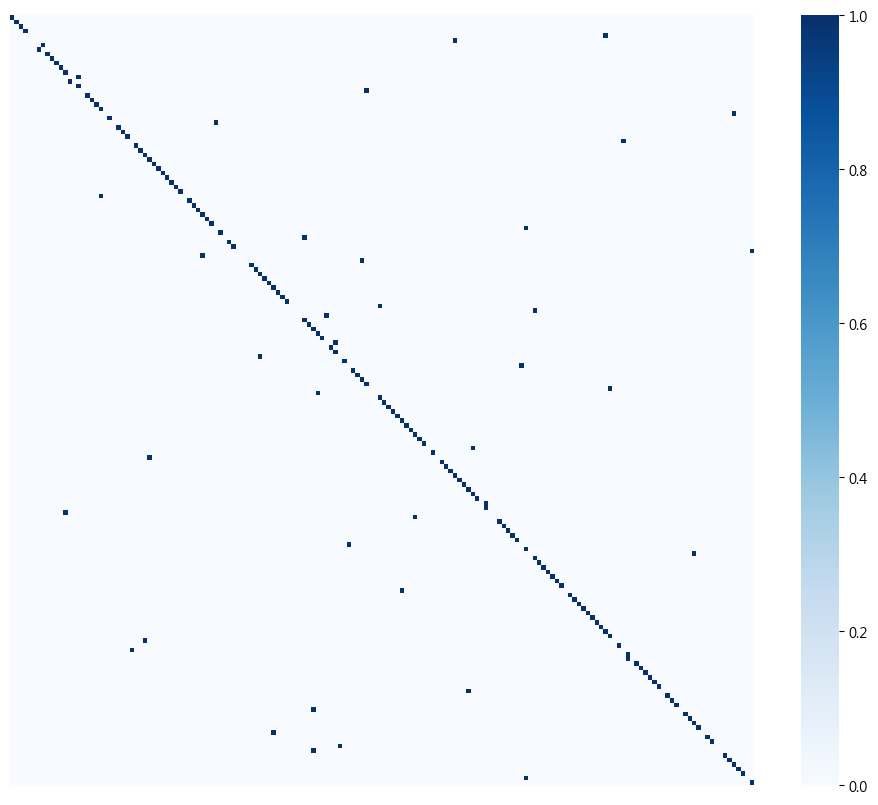

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 使用中文標籤的假設真實標籤和預測標籤

# 計算混淆矩陣
conf_mat = confusion_matrix(y_true, y_pred, labels=id_list)
plt.figure(figsize=(12, 10))
# 使用Seaborn繪製混淆矩陣
sns.heatmap(conf_mat, annot=False, cmap="Blues")

# 隱藏軸標籤
plt.xticks([])
plt.yticks([])

plt.show()


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 計算準確率
accuracy = accuracy_score(y_true, y_pred)

# 計算召回率
recall = recall_score(y_true, y_pred, average='macro')  # 'macro' 表示未加權平均

# 計算精確度
precision = precision_score(y_true, y_pred, average='macro')

# 計算 F1 分數
f1 = f1_score(y_true, y_pred, average='macro')

print('accuracy:',accuracy, 'recall:',recall, 'precision:',precision, 'f1:',f1)


accuracy: 0.7559523809523809 recall: 0.7559523809523809 precision: 0.6676587301587301 f1: 0.6964285714285714
